In [1]:
import tensorflow as tf
from cnnmodel import CNNModel

In [2]:
# Open Model
# cnnmodel = CNNModel(modelname="classification", filename="simple2.h5", modelkind='simple', image_argumentation=False)
cnnmodel = CNNModel(modelname="grade", filename="simple.h5", modelkind='simple', image_argumentation=False)

Found 772 images belonging to 4 classes.
Found 190 images belonging to 4 classes.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496 

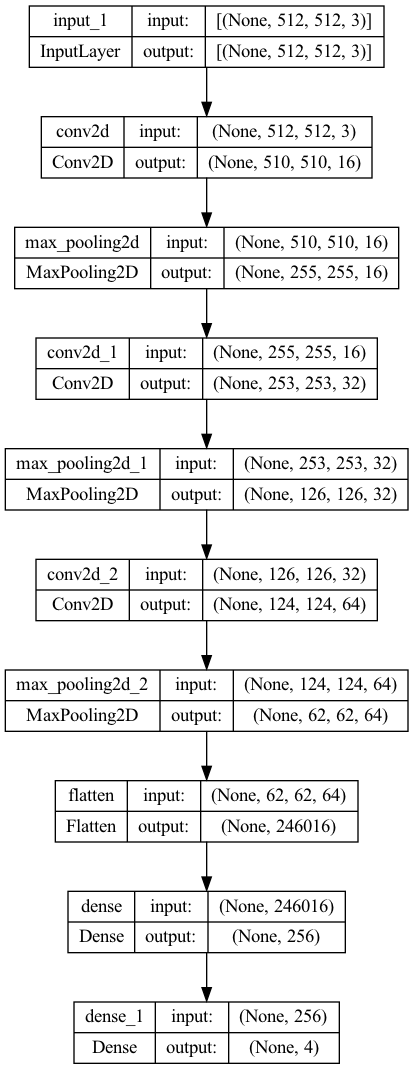

In [3]:
cnnmodel.model.summary()
tf.keras.utils.plot_model(cnnmodel.model, show_shapes=True, show_layer_names=True)

In [4]:
history = cnnmodel.train(epochs=100, callback_patience=20)

Epoch 1/100


/Users/gana-pt6678/anaconda3/envs/cancerdiagnosis/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 49s 2s/step - loss: 6.5170 - accuracy: 0.5389 - val_loss: 0.8326 - val_accuracy: 0.6421
Epoch 2/100
25/25 [==============================] - 47s 2s/step - loss: 0.7775 - accuracy: 0.6658 - val_loss: 0.5556 - val_accuracy: 0.6789
Epoch 3/100
25/25 [==============================] - 46s 2s/step - loss: 0.5134 - accuracy: 0.8212 - val_loss: 0.6984 - val_accuracy: 0.7684
Epoch 4/100
25/25 [==============================] - 46s 2s/step - loss: 0.2651 - accuracy: 0.9352 - val_loss: 0.5834 - val_accuracy: 0.7947
Epoch 5/100
25/25 [==============================] - 47s 2s/step - loss: 0.1153 - accuracy: 0.9806 - val_loss: 0.4119 - val_accuracy: 0.8684
Epoch 6/100
25/25 [==============================] - 47s 2s/step - loss: 0.1421 - accuracy: 0.9624 - val_loss: 0.6495 - val_accuracy: 0.7632
Epoch 7/100
25/25 [==============================] - 47s 2s/step - loss: 0.0669 - accuracy: 0.9896 - val_loss: 0.7619 - val_accuracy: 0.8211
Epoch 8/100
25/25 [======

In [5]:
print("Evaluating model:")
print(cnnmodel.model.evaluate(cnnmodel.validation_generator))

Evaluating model:
6/6 [==============================] - 9s 1s/step - loss: 0.4119 - accuracy: 0.8684
[0.41186243295669556, 0.8684210777282715]


In [6]:
cnnmodel.save(filename=None)

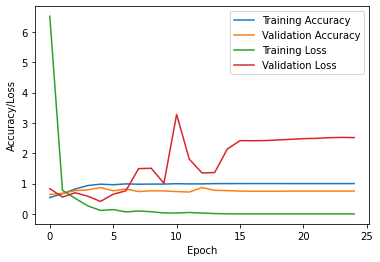

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()
plt.savefig(cnnmodel.filename + "_history.png")

In [9]:
# cnnmodel.predict(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img("test.jpg", target_size=(512, 512))) / 255.0)